# **Milestone 1**

## **Context**
 - In the contect of marketing analytics, customer segmentation has a vital role to play in optimizing return on investment.
 - Customer segmentation is the process of dividing a dataset of customers into groups of similar customers based on certain common characteristics, usually for the purpose of understanding the population dataset in a better fashion.

### **The objectives:**

 - Use dimensionality reduction and clustering to come up with the best possible customer segments using the customer dataset.

### **The key questions:**

- What are the key questions that need to be answered?



### **The problem formulation**:

- What is it that we are trying to solve using data science?

------------------------------
## **Data Dictionary**
------------------------------

The dataset contains the following features:

1. ID: Unique ID of each customer
2. Year_Birth: Customer’s year of birth
3. Education: Customer's level of education
4. Marital_Status: Customer's marital status
5. Kidhome: Number of small children in customer's household
6. Teenhome: Number of teenagers in customer's household
7. Income: Customer's yearly household income in USD
8. Recency: Number of days since the last purchase
9. Dt_Customer: Date of customer's enrollment with the company
10. MntFishProducts: The amount spent on fish products in the last 2 years
11. MntMeatProducts: The amount spent on meat products in the last 2 years
12. MntFruits: The amount spent on fruits products in the last 2 years
13. MntSweetProducts: Amount spent on sweet products in the last 2 years
14. MntWines: The amount spent on wine products in the last 2 years
15. MntGoldProds: The amount spent on gold products in the last 2 years
16. NumDealsPurchases: Number of purchases made with discount
17. NumCatalogPurchases: Number of purchases made using a catalog (buying goods to be shipped through the mail)
18. NumStorePurchases: Number of purchases made directly in stores
19. NumWebPurchases: Number of purchases made through the company's website
20. NumWebVisitsMonth: Number of visits to the company's website in the last month
21. AcceptedCmp1: 1 if customer accepted the offer in the first campaign, 0 otherwise
22. AcceptedCmp2: 1 if customer accepted the offer in the second campaign, 0 otherwise
23. AcceptedCmp3: 1 if customer accepted the offer in the third campaign, 0 otherwise
24. AcceptedCmp4: 1 if customer accepted the offer in the fourth campaign, 0 otherwise
25. AcceptedCmp5: 1 if customer accepted the offer in the fifth campaign, 0 otherwise
26. Response: 1 if customer accepted the offer in the last campaign, 0 otherwise
27. Complain: 1 If the customer complained in the last 2 years, 0 otherwise

**Note:** You can assume that the data is collected in the year 2016.

## **Important Notes**

- This notebook can be considered a guide to refer to while solving the problem. The evaluation will be as per the Rubric shared for each Milestone. Unlike previous courses, it does not follow the pattern of the graded questions in different sections. This notebook will give you a direction on what steps need to be taken in order to get a viable solution to the problem. Please note that this is just one way of doing this. There can be other 'creative' ways to solve the problem and we urge you to feel free and explore them as an 'optional' exercise. 

- In the notebook, there are markdown cells called - Observations and Insights. It is a good practice to provide observations and extract insights from the outputs.

- The naming convention for different variables can vary. Please consider the code provided in this notebook as a sample code.

- All the outputs in the notebook are just for reference and can be different if you follow a different approach.

- There are sections called **Think About It** in the notebook that will help you get a better understanding of the reasoning behind a particular technique/step. Interested learners can take alternative approaches if they wish to explore different techniques. 

# **Milestone 1** 

### **Loading Libraries**

In [1]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# To scale the data using z-score
from sklearn.preprocessing import StandardScaler

# To compute distances
from scipy.spatial.distance import cdist

# To perform K-means clustering and compute Silhouette scores
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# To visualize the elbow curve and Silhouette scores
# from yellowbrick.cluster import SilhouetteVisualizer

# Importing PCA
from sklearn.decomposition import PCA

# To encode the variable
from sklearn.preprocessing import LabelEncoder

# Importing TSNE
from sklearn.manifold import TSNE

# To perform hierarchical clustering, compute cophenetic correlation, and create dendrograms
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet

# To compute distances
from scipy.spatial.distance import pdist

# To import K-Medoids
# from sklearn_extra.cluster import KMedoids

# To import Gaussian Mixture
from sklearn.mixture import GaussianMixture

# To supress warnings
import warnings

warnings.filterwarnings("ignore")

In [2]:
# !pip install yellowbrick

In [3]:
# !pip uninstall scikit-learn -y

In [4]:
# !pip3 install scikit-learn 

In [5]:
# To visualize the elbow curve and Silhouette scores
from yellowbrick.cluster import SilhouetteVisualizer

In [6]:
# !pip install scikit-learn-extra

In [7]:
# To import K-Medoids
from sklearn_extra.cluster import KMedoids

### **Let us load the data**

In [8]:
# loading the dataset
data = pd.read_csv("marketing_campaign.csv")

### **Check the shape of the data**

In [9]:
# Print the shape of the data
data.shape

(2240, 27)

#### **Observations and Insights: **
- The dataset contains 2240 rows.
- The dataset contains 27 columns

### **Understand the data by observing a few rows**

In [10]:
# View first 5 rows
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,10,4,7,0,0,0,0,0,0,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,1,2,5,0,0,0,0,0,0,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,2,10,4,0,0,0,0,0,0,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,0,4,6,0,0,0,0,0,0,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,3,6,5,0,0,0,0,0,0,0


In [11]:
# View last 5 rows Hint: Use tail() method
data.tail()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,3,4,5,0,0,0,0,0,0,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,2,5,7,0,0,0,1,0,0,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,3,13,6,0,1,0,0,0,0,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,5,10,3,0,0,0,0,0,0,0
2239,9405,1954,PhD,Married,52869.0,1,1,15-10-2012,40,84,...,1,4,7,0,0,0,0,0,0,1


#### **Observations and Insights: _____**

### **Let us check the data types and and missing values of each column** 

In [12]:
# Check the datatypes of each column. Hint: Use info() method
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [13]:
# Find the percentage of missing values in each column of the data
data.isnull().sum() / data.shape[0] * 100

ID                     0.000000
Year_Birth             0.000000
Education              0.000000
Marital_Status         0.000000
Income                 1.071429
Kidhome                0.000000
Teenhome               0.000000
Dt_Customer            0.000000
Recency                0.000000
MntWines               0.000000
MntFruits              0.000000
MntMeatProducts        0.000000
MntFishProducts        0.000000
MntSweetProducts       0.000000
MntGoldProds           0.000000
NumDealsPurchases      0.000000
NumWebPurchases        0.000000
NumCatalogPurchases    0.000000
NumStorePurchases      0.000000
NumWebVisitsMonth      0.000000
AcceptedCmp3           0.000000
AcceptedCmp4           0.000000
AcceptedCmp5           0.000000
AcceptedCmp1           0.000000
AcceptedCmp2           0.000000
Complain               0.000000
Response               0.000000
dtype: float64

#### **Observations and Insights: _____**

We can observe that `ID` has no null values. Also the number of unique values are equal to the number of observations. So, `ID` looks like an index for the data entry and such a column would not be useful in providing any predictive power for our analysis. Hence, it can be dropped.

**Dropping the ID column**

In [14]:
# Remove ID column from data. Hint: Use inplace = True
data.drop(columns = ["ID"], inplace = True)

## **Exploratory Data Analysis**

### **Let us now explore the summary statistics of numerical variables**

In [15]:
# Explore basic summary statistics of numeric variables. Hint: Use describe() method.
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Year_Birth,2240.0,1968.805804,11.984069,1893.0,1959.00,1970.0,1977.00,1996.0
Income,2216.0,52247.251354,25173.076661,1730.0,35303.00,51381.5,68522.00,666666.0
Kidhome,2240.0,0.444196,0.538398,0.0,0.00,0.0,1.00,2.0
Teenhome,2240.0,0.506250,0.544538,0.0,0.00,0.0,1.00,2.0
Recency,2240.0,49.109375,28.962453,0.0,24.00,49.0,74.00,99.0
MntWines,2240.0,303.935714,336.597393,0.0,23.75,173.5,504.25,1493.0
MntFruits,2240.0,26.302232,39.773434,0.0,1.00,8.0,33.00,199.0
MntMeatProducts,2240.0,166.950000,225.715373,0.0,16.00,67.0,232.00,1725.0
MntFishProducts,2240.0,37.525446,54.628979,0.0,3.00,12.0,50.00,259.0
MntSweetProducts,2240.0,27.062946,41.280498,0.0,1.00,8.0,33.00,263.0


#### **Observations and Insights: _____**

### **Let us also explore the summary statistics of all categorical variables and the number of unique observations in each category**

In [16]:
# List of the categorical columns in the data
cols = ["Education", "Marital_Status", "Kidhome", "Teenhome", "Complain"]

**Number of unique observations in each category**

In [17]:
for column in cols:
    print("Unique values in", column, "are :")
    print(data[column].nunique())
    print("*" * 50)

Unique values in Education are :
5
**************************************************
Unique values in Marital_Status are :
8
**************************************************
Unique values in Kidhome are :
3
**************************************************
Unique values in Teenhome are :
3
**************************************************
Unique values in Complain are :
2
**************************************************


#### **Observations and Insights: _____**

**Think About It:**

- We could observe from the summary statistics of categorical variables that the Education variable has 5 categories. Are all categories different from each other or can we combine some categories? Is 2n Cycle different from Master? 
- Similarly, there are 8 categories in Marital_Status with some categories having very low count of less than 5. Can we combine these categories with other categories? 

### **Let us replace  the "2n Cycle" category with "Master" in Education and "Alone", "Absurd, and "YOLO" with "Single" in Marital_Status**

In [18]:
# Replace the category "2n Cycle" with the category "Master"

data["Education"].replace('2n Cycle', 'Master', inplace=True)  # Hint: Use the replace() method and inplace=True

In [19]:
# Replace the categories "Alone", "Abusrd", "YOLO" with the category "Single"

data["Marital_Status"].replace(['Alone','Absurd','YOLO'], 'Single', inplace=True)  # Hint: Use the replace() method and inplace=True

## **Univariate Analysis**
Univariate analysis is used to explore each variable in a data set, separately. It looks at the range of values, as well as the central tendency of the values. It can be done for both numerical and categorical variables.

## **1. Univariate Analysis - Numerical Data**
Histograms help to visualize and describe numerical data. We can also use other plots like box plot to analyze the numerical columns.

#### Let us plot histogram for the feature 'Income' to understand the distribution and outliers, if any.

In [20]:
data.columns

Index(['Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response'],
      dtype='object')

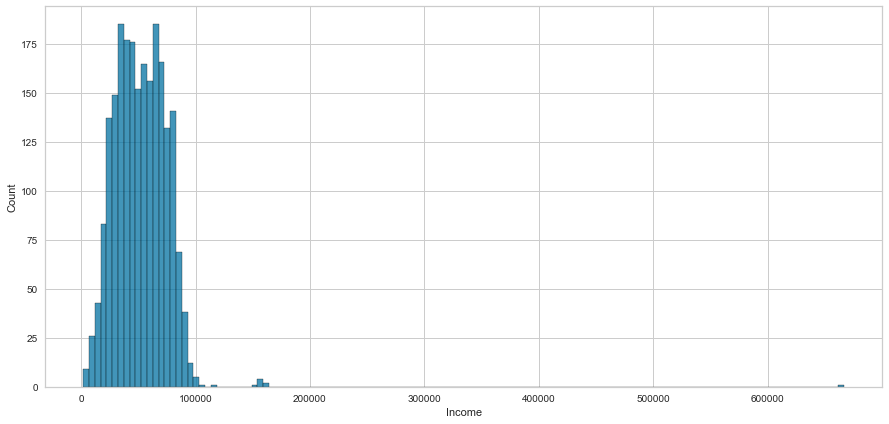

In [21]:
# Create histogram for the Income feature

plt.figure(figsize=(15, 7))
sns.histplot(x=data.Income, data=data)
plt.show()

**We could observe some extreme value on the right side of the distribution of the 'Income' feature. Let's use a box plot as it is more suitable to identify extreme values in the data.** 

In [22]:
data.Income.describe()

count      2216.000000
mean      52247.251354
std       25173.076661
min        1730.000000
25%       35303.000000
50%       51381.500000
75%       68522.000000
max      666666.000000
Name: Income, dtype: float64

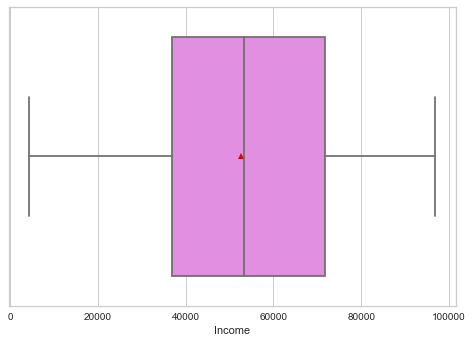

In [23]:
# Plot the boxplot
sns.boxplot(data=data.Income, x=data.Year_Birth, showmeans=True, color="violet");

#### **Observations and Insights: _____**

**Think About It**

- The histogram and the box plot are showing some extreme value on the right side of the distribution of the 'Income' feature. Can we consider them as outliers and remove or should we analyze these extreme values?

In [24]:
# Calculating the upper whisker for the Income variable

Q1 = data.quantile(q=0.25)                          # Finding the first quartile

Q3 = data.quantile(q=0.75)                          # Finding the third quartile

IQR = Q3 - Q1                                      # Finding the Inter Quartile Range

upper_whisker = (Q3 + 1.5 * IQR)['Income']          # Calculating the Upper Whisker for the Income variable

print(upper_whisker)                                # Printing Upper Whisker

118350.5


In [25]:
# Let's check the observations with extreme value for the Income variable
data[data.Income > upper_whisker]

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
164,1973,PhD,Married,157243.0,0,1,01-03-2014,98,20,2,...,22,0,0,0,0,0,0,0,0,0
617,1976,PhD,Together,162397.0,1,1,03-06-2013,31,85,1,...,0,1,1,0,0,0,0,0,0,0
655,1975,Graduation,Divorced,153924.0,0,0,07-02-2014,81,1,1,...,0,0,0,0,0,0,0,0,0,0
687,1982,PhD,Married,160803.0,0,0,04-08-2012,21,55,16,...,28,1,0,0,0,0,0,0,0,0
1300,1971,Master,Together,157733.0,1,0,04-06-2013,37,39,1,...,0,1,1,0,0,0,0,0,0,0
1653,1977,Graduation,Together,157146.0,0,0,29-04-2013,13,1,0,...,28,0,1,0,0,0,0,0,0,0
2132,1949,PhD,Married,156924.0,0,0,29-08-2013,85,2,1,...,0,0,0,0,0,0,0,0,0,0
2233,1977,Graduation,Together,666666.0,1,0,02-06-2013,23,9,14,...,1,3,6,0,0,0,0,0,0,0


**Think About It:**

- We observed that there are only a few rows with extreme values for the Income variable. Is that enough information to treat (or not to treat) them? Do we know at what percentile the upper whisker lies? 

In [26]:
# Check the 99.5% percentile value for the Income variable
data.quantile(q=0.995)['Income']

102145.75000000003

#### **Observations and Insights: _____**

In [27]:
lower_whisker = (Q1 - 1.5 * IQR)['Income']          # Calculating the Lower Whisker for the Income variable

# Let's check the observations with extreme value for the Income variable
data[data.Income < lower_whisker]

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response


In [28]:
# data.Income.min() # the minimum value of the Income column in the data is 1730.0

In [29]:
# Dropping observations identified as outliers 
# data.drop(index=[_______________], inplace=True) # Pass the indices of the observations (separated by a comma) to drop them

In [30]:
data[data.Income > upper_whisker].index

Int64Index([164, 617, 655, 687, 1300, 1653, 2132, 2233], dtype='int64')

In [31]:
# Dropping observations identified as outliers 
data.drop(index=[164, 617, 655, 687, 1300, 1653, 2132, 2233], inplace=True) # Pass the indices of the observations (separated by a comma) to drop them

**Now, let's check the distribution of the Income variable after dropping outliers.**

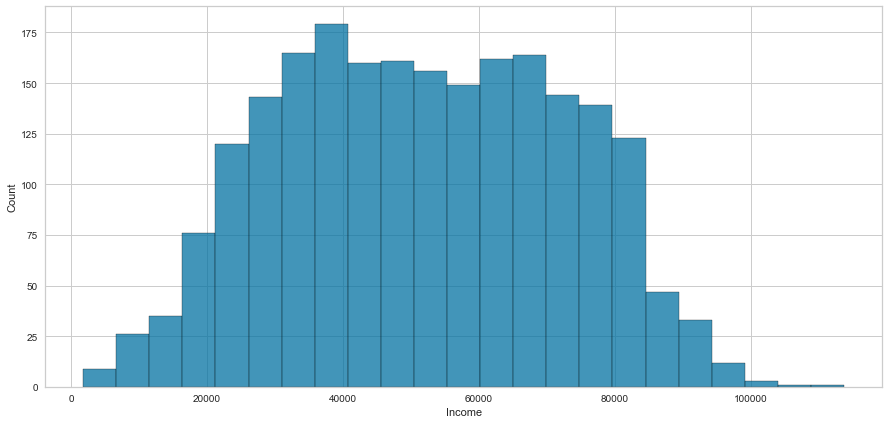

In [32]:
# Plot histogram and 'Income'
plt.figure(figsize=(15, 7))
sns.histplot(x=data.Income, data=data)
plt.show()

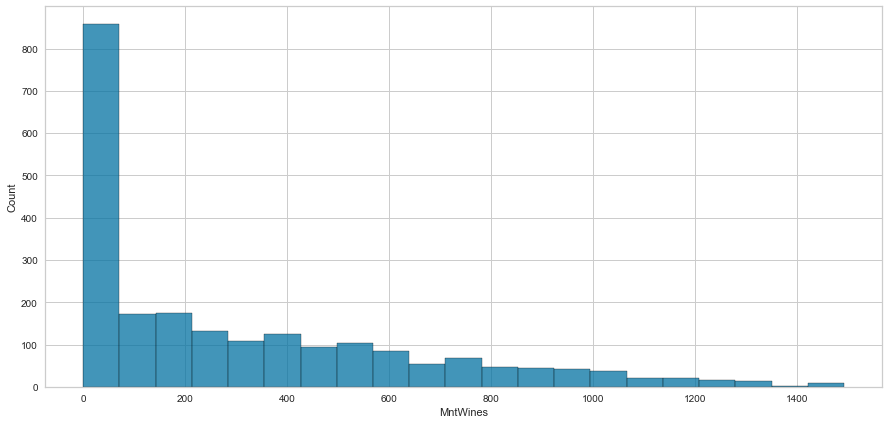

In [33]:
# Plot the histogram for 'MntWines'
plt.figure(figsize=(15, 7))
sns.histplot(x=data.MntWines, data=data)
plt.show()

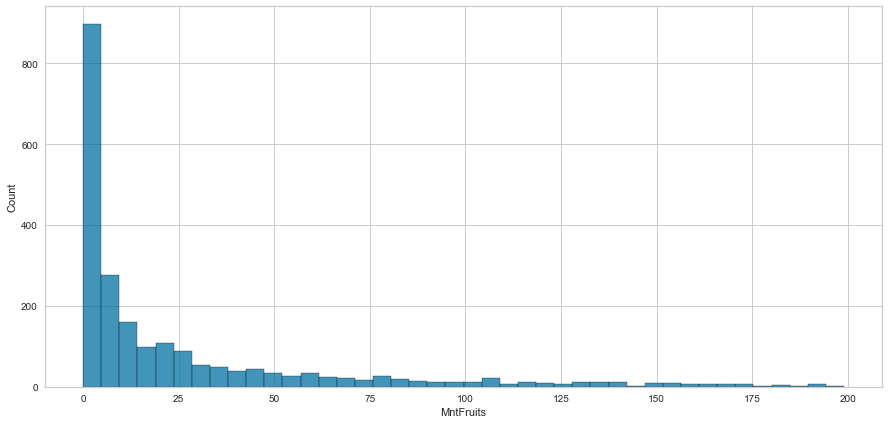

In [34]:
# Plot the histogram for 'MntFruits'
plt.figure(figsize=(15, 7))
sns.histplot(x=data.MntFruits, data=data)
plt.show()

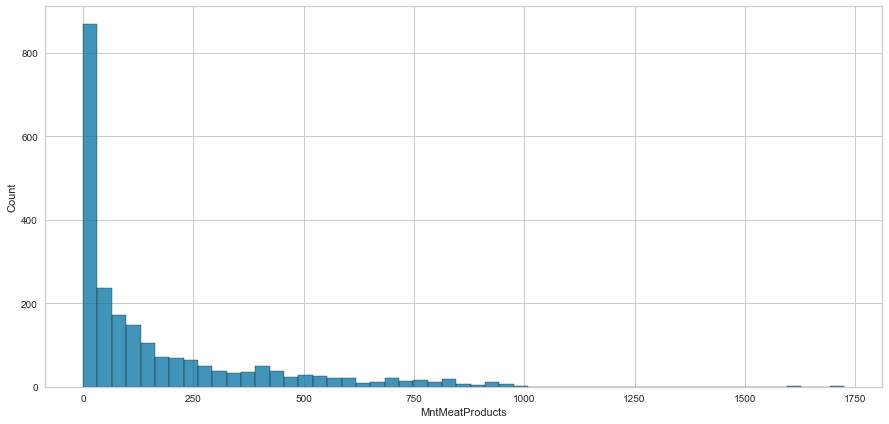

In [35]:
# Plot the histogram for 'MntMeatProducts' 
plt.figure(figsize=(15, 7))
sns.histplot(x=data.MntMeatProducts, data=data)
plt.show()

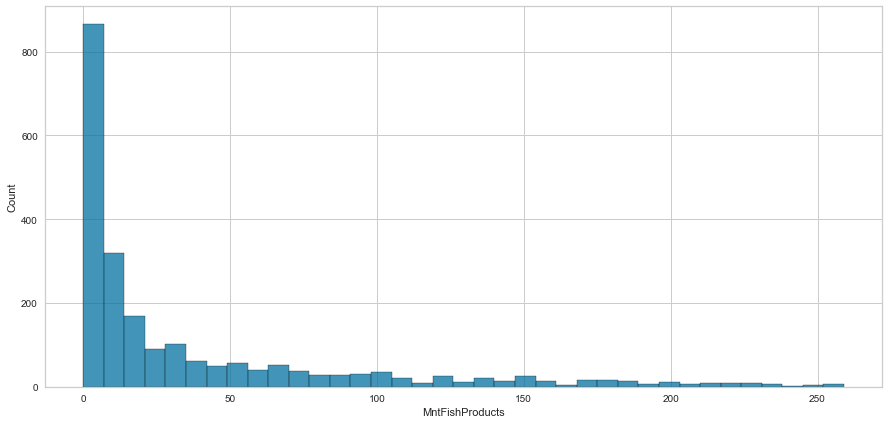

In [36]:
# Plot the histogram for 'MntFishProducts'
plt.figure(figsize=(15, 7))
sns.histplot(x=data.MntFishProducts, data=data)
plt.show()

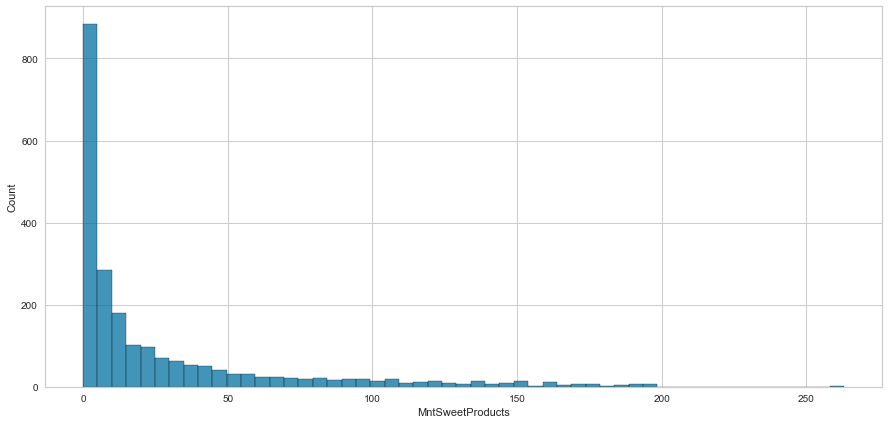

In [37]:
# Plot the histogram for 'MntSweetProducts'
plt.figure(figsize=(15, 7))
sns.histplot(x=data.MntSweetProducts, data=data)
plt.show()

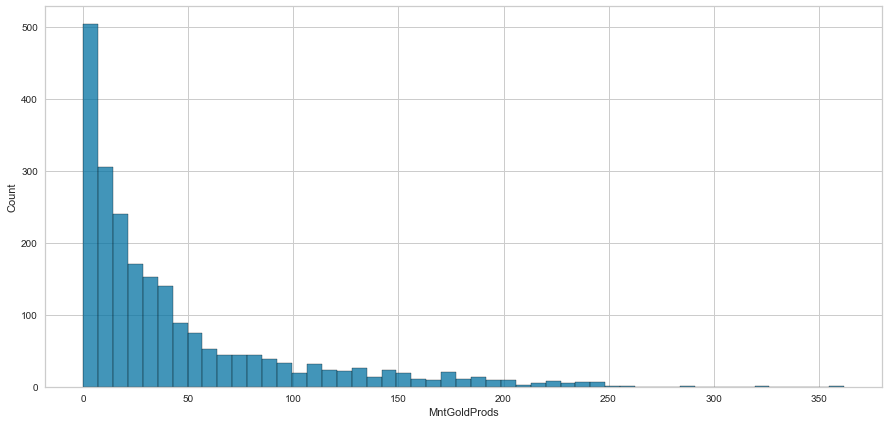

In [38]:
# Plot the histogram for 'MntGoldProducts', no should be MntGoldProds
plt.figure(figsize=(15, 7))
sns.histplot(x=data.MntGoldProds, data=data)
plt.show()

#### **Note:** Try plotting histogram for different numerical features and understand how the data looks like.

#### **Observations and Insights for all the plots: _____**

## **2. Univariate analysis - Categorical Data**

Let us write a function that will help us create bar plots that indicate the percentage for each category. This function takes the categorical column as the input and returns the bar plot for the variable.

In [39]:
def perc_on_bar(z):
    '''
    plot
    feature: categorical feature
    the function won't work if a column is passed in hue parameter
    '''

    total = len(data[z])                                          # Length of the column
    plt.figure(figsize=(15,5))
    ax = sns.countplot(data[z],palette='Paired',order = data[z].value_counts().index)
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) # Percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05                  # Width of the plot
        y = p.get_y() + p.get_height()                            # Height of the plot
        
        ax.annotate(percentage, (x, y), size = 12)                # Annotate the percentage 
    
    plt.show()                                                    # Show the plot

#### Let us plot barplot for the variable Marital_Status.

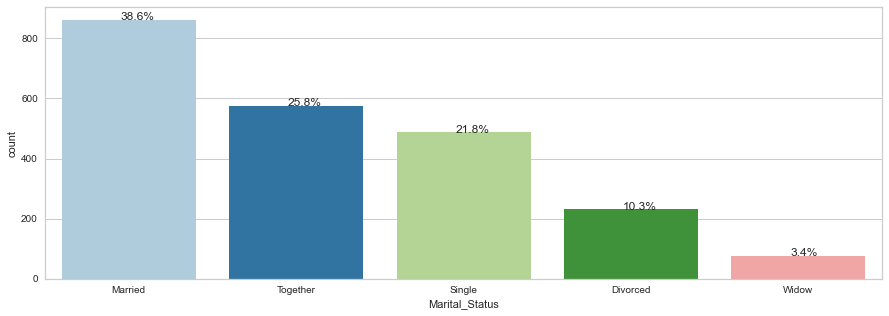

In [40]:
# Bar plot for 'Marital_Status'
perc_on_bar('Marital_Status')

#### **Note:** Explore for other categorical variables like Education, Kidhome, Teenhome, Complain.

#### **Observations and Insights from all plots: _____**

## **Bivariate Analysis**

We have analyzed different categorical and numerical variables. Now, let's check how different variables are related to each other.

### **Correlation Heat map**
Heat map can show a 2D correlation matrix between numerical features.

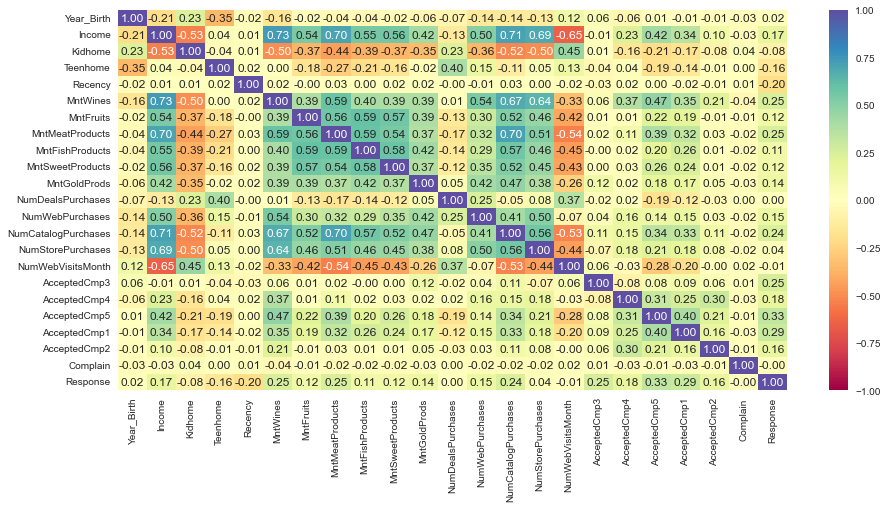

In [41]:
plt.figure(figsize=(15, 7))                                                        # Setting the plot size
sns.heatmap(data.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")  # Plotting the correlation plot
plt.show()

#### **Observations and Insights: _____**

**The above correlation heatmap only shows the relationship between numerical variables. Let's check the relationship of numerical variables with categorical variables.**

### **Education Vs Income**

AxesSubplot(0.125,0.125;0.775x0.755)


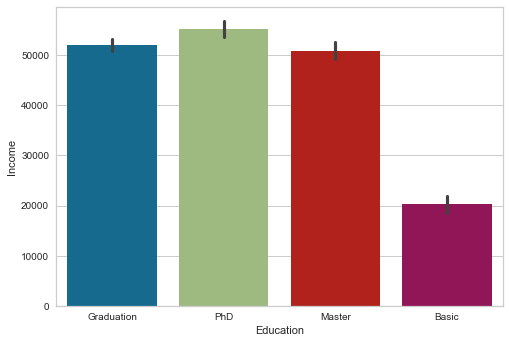

In [42]:
print(sns.barplot(x=data.Education, y=data.Income, data=data));

#### **Observations and Insights: _____**

### **Marital Status Vs Income**

AxesSubplot(0.125,0.125;0.775x0.755)


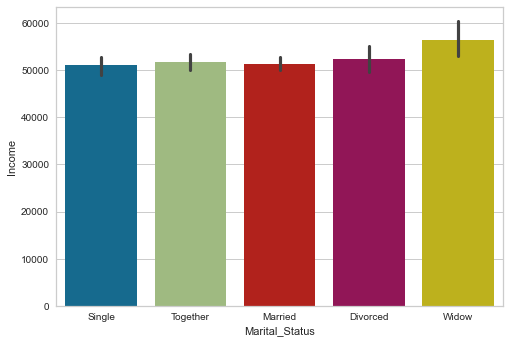

In [43]:
# Plot the bar plot for Marital_Status and Income
print(sns.barplot(x=data.Marital_Status, y=data.Income, data=data));

#### **Observations and Insights: _____**

### **Kidhome Vs Income**

AxesSubplot(0.125,0.125;0.775x0.755)


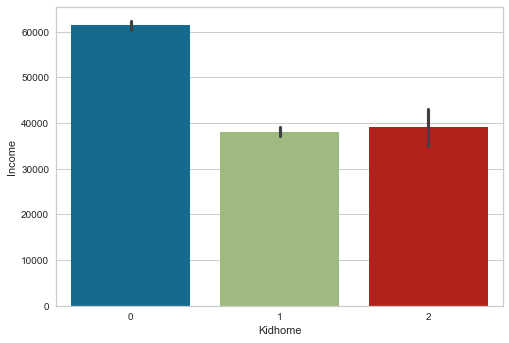

In [44]:
# Plot the bar plot for Kidhome and Income
print(sns.barplot(x=data.Kidhome, y=data.Income, data=data));

#### **Observations and Insights: _____**

**We can also visualize the relationship between two categorical variables.**

### **Marital_Status Vs Kidhome**

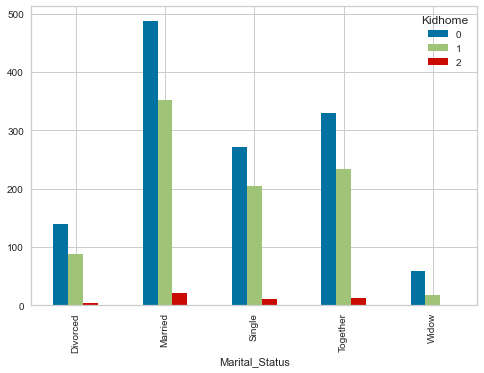

In [45]:
# Plot the bar plot for Marital_Status and Kidhome
pd.crosstab(data.Marital_Status,data.Kidhome).plot(kind='bar',stacked=False);

#### **Observations and Insights: _____**

## **Feature Engineering and Data Processing**

In this section, we will first prepare our dataset for analysis.
- Creating new columns
- Imputing missing values

**Think About It:**

- The Year_Birth column in the current format might not be very useful in our analysis. The Year_Birth column contains the information about Day, Month, and year. Can we extract the age of each customer?
- Are there other columns which can be used to create new features?

### **Age** 

In [46]:
# Extract only the year from the Year_Birth variable and subtracting it from 2016 will give us the age of the customer at the time of data collection in 2016

data["Age"] = 2016 - pd.to_datetime(data.Year_Birth, format="%Y").apply(lambda x: x.year) 

# Sorting the values in ascending order 
data["Age"].sort_values()                                         

1170     20
46       20
696      21
747      21
1850     21
       ... 
424      75
1950     76
192     116
339     117
239     123
Name: Age, Length: 2232, dtype: int64

#### **Observations and Insights: _____**

**Think About It:**

- We could observe from the above output that there are customers with an age greater than 115. Can this be true or a data anomaly? Can we drop these observations?

In [47]:
# Drop the observations with age > 115
# data[data.Age > 115] # indices 192, 239, and 339
# Hint: Use drop() method with inplace=True
data.drop(index=[192, 239, 339], inplace=True)

**Now, let's check the distribution of age in the data.**

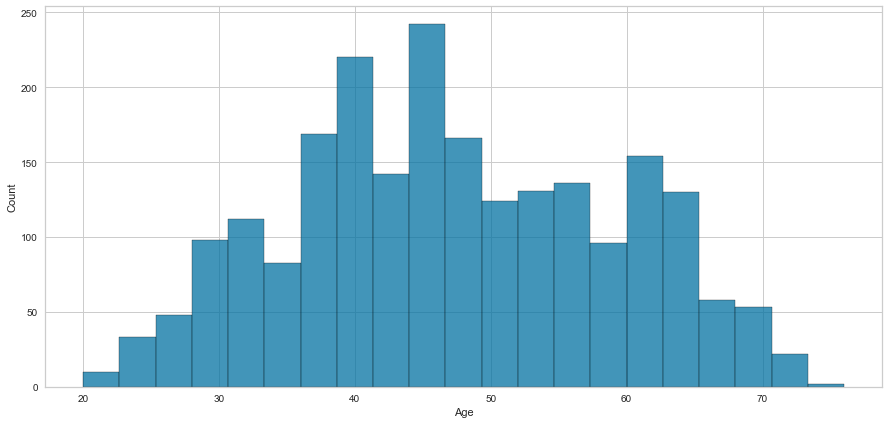

In [48]:
# Plot histogram to check the distribution of age
plt.figure(figsize=(15, 7))
sns.histplot(x=data.Age, data=data)
plt.show()

#### **Observations and Insights: _____**

### **Kids** 
* Let's create feature "Kids" indicating the total kids and teens in the home.

In [49]:
# Add Kidhome and Teenhome variables to create the new feature called "Kids"
data["Kids"] = data.Kidhome + data.Teenhome

### **Family Size**
* Let's create a new variable called 'Family Size' to find out how many members each family has.
* For this, we need to have a look at the Marital_Status variable, and see what are the categories.

In [50]:
# Check the unique categories in Marial_Status
data.Marital_Status.unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow'], dtype=object)

* We can combine the sub-categories Single, Divorced, Widow as "Single" and we can combine the sub-categories Married and Together as "Relationship" 
* Then we can create a new variable called "Status" and assign values 1 and 2 to categories Single and Relationship, respectively.
* Then, we can use the Kids (calculated above) and the Status column to find the family size.

In [51]:
# Replace "Married" and "Together" with "Relationship"
data["Marital_Status"].replace(['Married','Together'], 'Relationship', inplace=True)

In [52]:
# Replace "Divorced" and "Widow" with "Single"
data["Marital_Status"].replace(['Divorced','Widow'], 'Single', inplace=True)

In [53]:
# Create a new feature called "Status" by replacing "Single" with 1 and "Relationship" with 2 in Marital_Status
data["Status"] = data['Marital_Status'].replace({'Single': 1, 'Relationship': 2}) 

In [54]:
# Add two variables Status and Kids to get the total number of persons in each family
data["Family_Size"] = data.Status + data.Kids

### **Expenses** 
* Let's create a new feature called "Expenses", indicating the total amount spent by the customers in various products over the span of two years.

In [55]:
# Create a new feature
# Add the amount spent on each of product 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds'
data["Expenses"] = data.MntWines + data.MntFruits + data.MntMeatProducts + data.MntFishProducts + data.MntSweetProducts + data.MntGoldProds

### **Total Purchases**
* Let's create a new feature called "NumTotalPurchases", indicating the total number of products purchased by the customers.

In [56]:
# Create a new feature
# Add the number of purchases from each channel 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases'
data["NumTotalPurchases"] = data.NumDealsPurchases + data.NumWebPurchases + data.NumCatalogPurchases + data.NumStorePurchases

### **Engaged in Days**
* Let's create a new feature called "Engaged in days", indicating how long the customer has been with the company.

In [57]:
# Converting Dt_customer variable to Python date time object
data["Dt_Customer"] = pd.to_datetime(data.Dt_Customer) 

**Let's check the max and min of the date.**

In [58]:
# Check the minimum of the date
# Hint: Use the min() method
data.Dt_Customer.min()

Timestamp('2012-01-08 00:00:00')

In [59]:
# Check the maximum of the date
# Hint: Use the max() method
data.Dt_Customer.max()

Timestamp('2014-12-06 00:00:00')

**Think About It:**
- From the above output from the max function, we observed that the last customer enrollment date is December 6th, 2014. Can we extract the number of days a customer has been with the company using some date as the threshold? Can January 1st, 2015 be that threshold?

In [60]:
 # Assigning date to the day variable
data["day"] = "01-01-2015"                         

# Converting the variable day to Python datetime object
data["day"] = pd.to_datetime(data.day)              

In [61]:
data["Engaged_in_days"] = (data["day"] - data["Dt_Customer"]).dt.days     

### **TotalAcceptedCmp**
* Let's create a new feature called "TotalAcceptedCmp" that shows how many offers customers have accepted.

In [62]:
# Add all the campaign related variables to get the total number of accepted campaigns by a customer
# "AcceptedCmp1", "AcceptedCmp2", "AcceptedCmp3", "AcceptedCmp4", "AcceptedCmp5", "Response"
data["TotalAcceptedCmp"] = data.AcceptedCmp1 + data.AcceptedCmp2 + data.AcceptedCmp3 + data.AcceptedCmp4 + data.AcceptedCmp5 + data.Response

### **AmountPerPurchase**
* Let's create a new feature called "AmountPerPurchase" indicating the amount spent per purchase.

In [63]:
# Divide the "Expenses" by "NumTotalPurchases" to create the new feature AmountPerPurchase 
data['AmountPerPurchase'] = data.Expenses / data.NumTotalPurchases

**Now, let's check the maximum value of the AmountPerPurchase.**

In [64]:
# Check the max value
# Hint: Use max() function
data.AmountPerPurchase.max()

inf

**Think About It:**

- Is the maximum value in the above output valid? What could be the potential reason for such output?
- How many such values are there? Can we drop such observations?

In [65]:
# Find how many observations have NumTotalPurchases equal to 0
data[data.NumTotalPurchases == 0]

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,Age,Kids,Status,Family_Size,Expenses,NumTotalPurchases,day,Engaged_in_days,TotalAcceptedCmp,AmountPerPurchase
981,1965,Graduation,Single,4861.0,0,0,2014-06-22,20,2,1,...,51,0,1,1,6,0,2015-01-01,193,0,inf
1524,1973,Graduation,Single,3502.0,1,0,2013-04-13,56,2,1,...,43,1,1,2,5,0,2015-01-01,628,0,inf


In [66]:
# Drop the observations with NumTotalPurchases equal to 0, using their indices
data.drop(index=[981, 1524], inplace=True)

**Now, let's check the distribution of values in AmountPerPurchase column.**

In [67]:
# Check the summary statistics of the AmountPerPurchase variable 
data.AmountPerPurchase.describe()

count    2227.000000
mean       33.274270
std        45.040897
min         0.533333
25%         9.714286
50%        23.352941
75%        45.281773
max      1679.000000
Name: AmountPerPurchase, dtype: float64

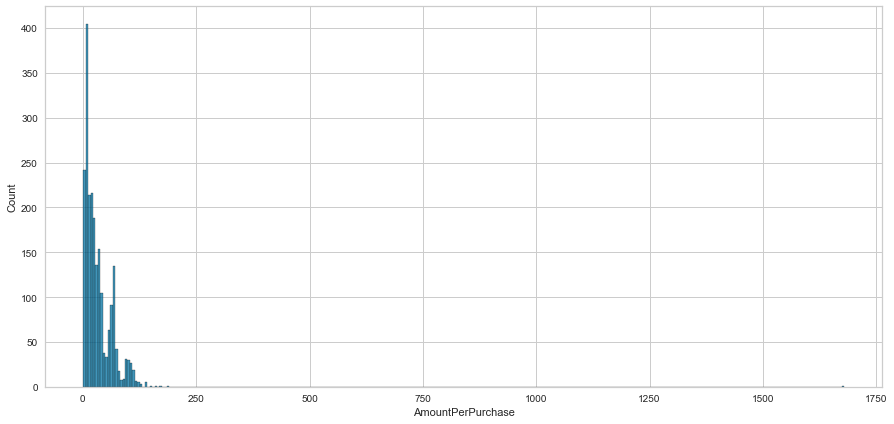

In [68]:
# Plot the histogram for the AmountPerPurchas variable
plt.figure(figsize=(15, 7))
sns.histplot(x=data.AmountPerPurchase, data=data)
plt.show()

#### **Observations and Insights: _____**

### **Imputing Missing Values**

In [69]:
# Impute the missing values for the Income variable with the median
data.Income = data.Income.fillna(data.Income.median())

**Now that we are done with data preprocessing, let's visualize new features against the new income variable we have after imputing missing values.**

### **Income Vs Expenses**

Text(0, 0.5, 'Expenses')

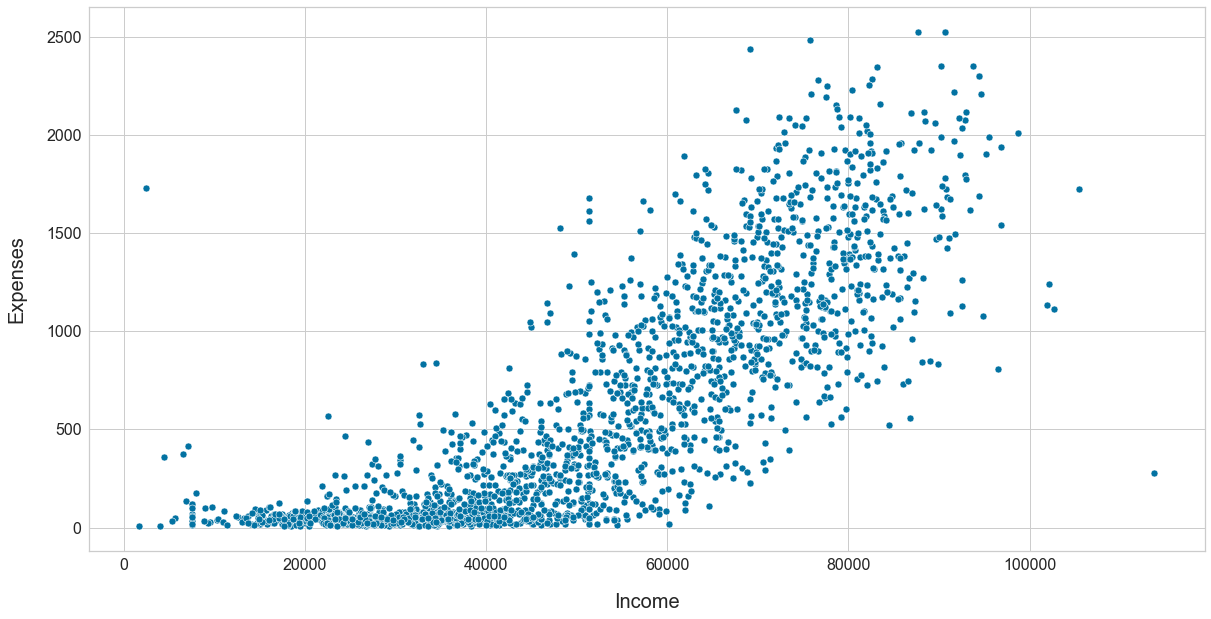

In [70]:
# Plot the scatter plot with Expenses on Y-axis and Income on X-axis  

plt.figure(figsize=(20, 10))                                    # Setting the plot size

sns.scatterplot(data=data, x=data.Income, y=data.Expenses);                                       # Hint: Use sns.scatterplot()  

plt.xticks(fontsize=16)                                         # Font size of X-label

plt.yticks(fontsize=16)                                         # Font size of Y-label

plt.xlabel("Income", fontsize=20, labelpad=20)                  # Title of X-axis

plt.ylabel("Expenses", fontsize=20, labelpad=20)                # Title of Y-axis

#### **Observations and Insights: _____**

### **Family Size Vs Income**

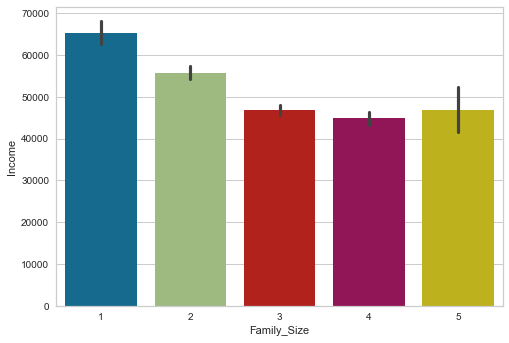

In [71]:
# Plot the bar plot for Family Size on X-axis and Income on Y-axis
sns.barplot(data=data, x=data.Family_Size, y=data.Income);

#### **Observations and Insights: _____**

## **Proposed approach**

- **Potential techniques -** What different techniques should be explored?
- **Overall solution design -** What is the potential solution design?
- **Measures of success -** What are the key measures of success?

In [72]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2227 entries, 0 to 2239
Data columns (total 36 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Year_Birth           2227 non-null   int64         
 1   Education            2227 non-null   object        
 2   Marital_Status       2227 non-null   object        
 3   Income               2227 non-null   float64       
 4   Kidhome              2227 non-null   int64         
 5   Teenhome             2227 non-null   int64         
 6   Dt_Customer          2227 non-null   datetime64[ns]
 7   Recency              2227 non-null   int64         
 8   MntWines             2227 non-null   int64         
 9   MntFruits            2227 non-null   int64         
 10  MntMeatProducts      2227 non-null   int64         
 11  MntFishProducts      2227 non-null   int64         
 12  MntSweetProducts     2227 non-null   int64         
 13  MntGoldProds         2227 non-nul

In [73]:
# data.to_csv("data.csv", index=False)